<a href="https://colab.research.google.com/github/juancarlosch1708-spec/IA/blob/main/Exposicion/CNN_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN_Cifar-10

### importamos las librerias y los modulos necesarios

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

### cargamos y preparamos los datos

In [ ]:
# CIFAR-10 ya esta dividido en entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Definimos los nombres de las 10 clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### procesamos los datos

In [ ]:
# Normalizar los valores de los píxeles para que estén entre 0 y 1
# Las imágenes originales están en el rango 0-255
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verifiquemos la forma de los datos
# Verás (50000, 32, 32, 3) -> 50,000 imágenes de 32x32 píxeles CON 3 CANALES (RGB)
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Forma de las etiquetas de entrenamiento:", train_labels.shape)

Forma de las imágenes de entrenamiento: (50000, 32, 32, 3)
Forma de las etiquetas de entrenamiento: (50000, 1)


### visualizamos los datos

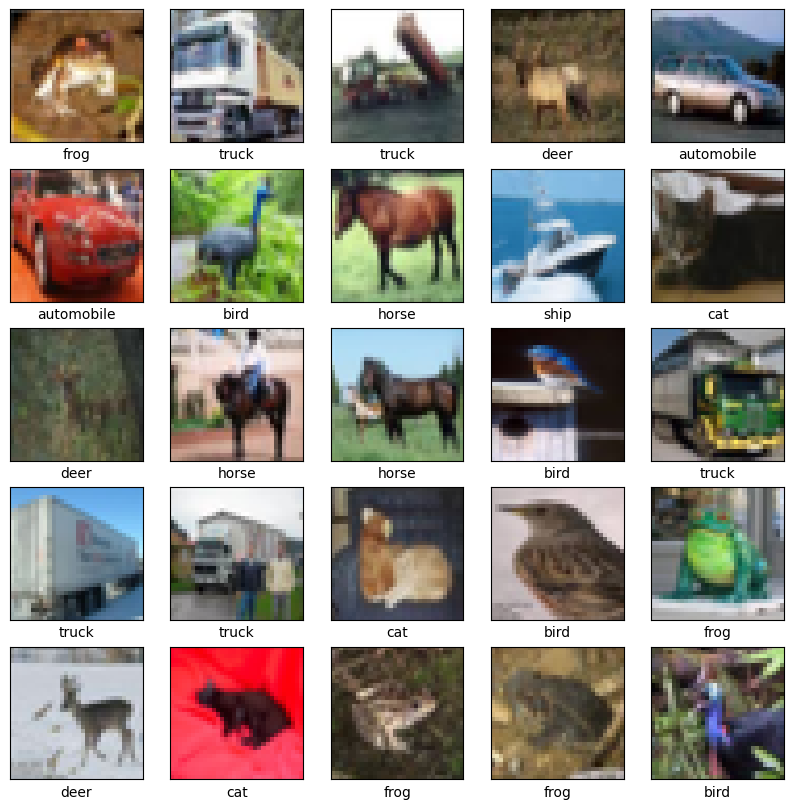

In [ ]:
# Esto nos ayuda a ver la complejidad de las imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Las etiquetas de CIFAR-10 son arrays, por eso necesitamos el [0]
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### construccion del modelo

In [ ]:
model = models.Sequential()

# **BLOQUE 1**
# CAMBIO CLAVE: input_shape es (32, 32, 3) para imágenes a color
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
# NUEVO: BatchNormalization estabiliza el aprendizaje
model.add(BatchNormalization())
# Agregamos otra capa Conv2D para aprender más patrones
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# NUEVO: Dropout "apaga" el 25% de las neuronas para evitar sobreajuste
model.add(Dropout(0.25))

# **BLOQUE 2** (Aumentamos el número de filtros a 64)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# **BLOQUE 3** (Aumentamos el número de filtros a 128)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# **BLOQUE CLASIFICADOR**
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
# Un Dropout más alto (50%) antes de la capa final
model.add(Dropout(0.5))
# Capa final con 10 neuronas (una por clase).
# No usamos 'softmax' aquí porque usaremos from_logits=True en la pérdida.
model.add(Dense(10))

# Imprimimos un resumen del modelo para ver la arquitectura
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

### compilar modelo

In [ ]:
# Usamos 'adam' y 'SparseCategoricalCrossentropy' como antes
# 'from_logits=True' es importante porque nuestra última capa no tiene softmax
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### entrenar modelo

In [ ]:
print("\n--- Iniciando Entrenamiento ---")
# Entrenamos por más épocas (ej. 25) porque el problema es más difícil
# Usamos un batch_size de 64
history = model.fit(train_images, train_labels,
                    epochs=25,
                    batch_size=64,
                    validation_data=(test_images, test_labels))
print("--- Entrenamiento Finalizado ---")


--- Iniciando Entrenamiento ---
Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3771 - loss: 1.9949 - val_accuracy: 0.5768 - val_loss: 1.2168
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6225 - loss: 1.0597 - val_accuracy: 0.6039 - val_loss: 1.1768
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7013 - loss: 0.8482 - val_accuracy: 0.7286 - val_loss: 0.7892
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7399 - loss: 0.7353 - val_accuracy: 0.7169 - val_loss: 0.8654
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7673 - loss: 0.6671 - val_accuracy: 0.7385 - val_loss: 0.7602
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7902 - loss: 0.6030 - val_accuracy: 0.7883 - val_loss: 0.6226
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8105 - loss: 0.5460 - val_accuracy: 0.7986 - val_loss: 0.5965
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0

### evaluamos el modelo


--- Evaluando Modelo ---


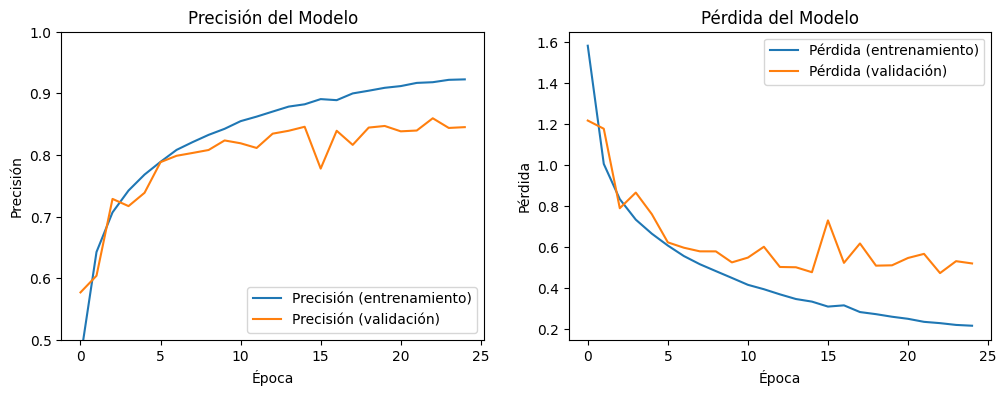

In [ ]:
print("\n--- Evaluando Modelo ---")
# 1. Graficar la precisión y pérdida del entrenamiento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión (entrenamiento)')
plt.plot(history.history['val_accuracy'], label = 'Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Precisión del Modelo')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida (entrenamiento)')
plt.plot(history.history['val_loss'], label = 'Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.title('Pérdida del Modelo')
plt.show()

In [ ]:
# 2. Evaluar la precisión final con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nPrecisión final en el conjunto de prueba: {test_acc*100:.2f}%")

313/313 - 2s - 6ms/step - accuracy: 0.8451 - loss: 0.5199

Precisión final en el conjunto de prueba: 84.51%


### visualizamos las predicciones

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


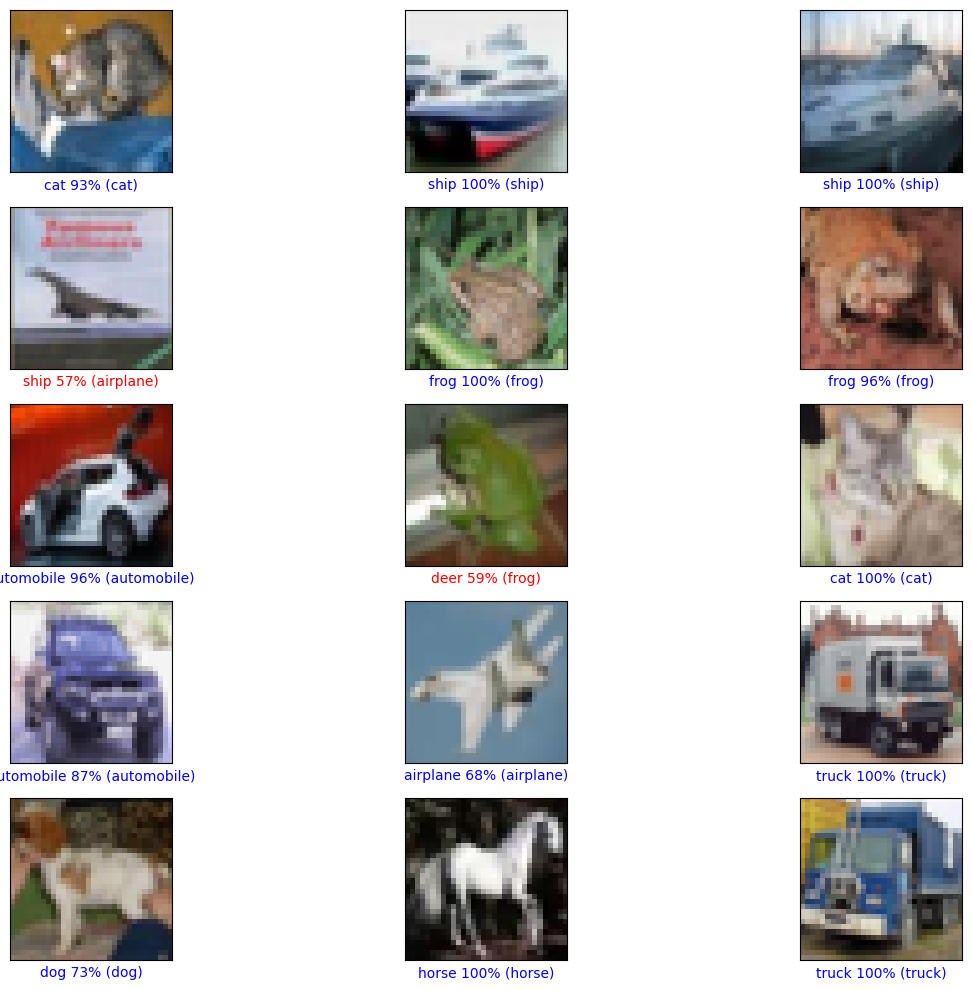

In [ ]:
# Creamos un modelo de probabilidad que añade la capa Softmax
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()

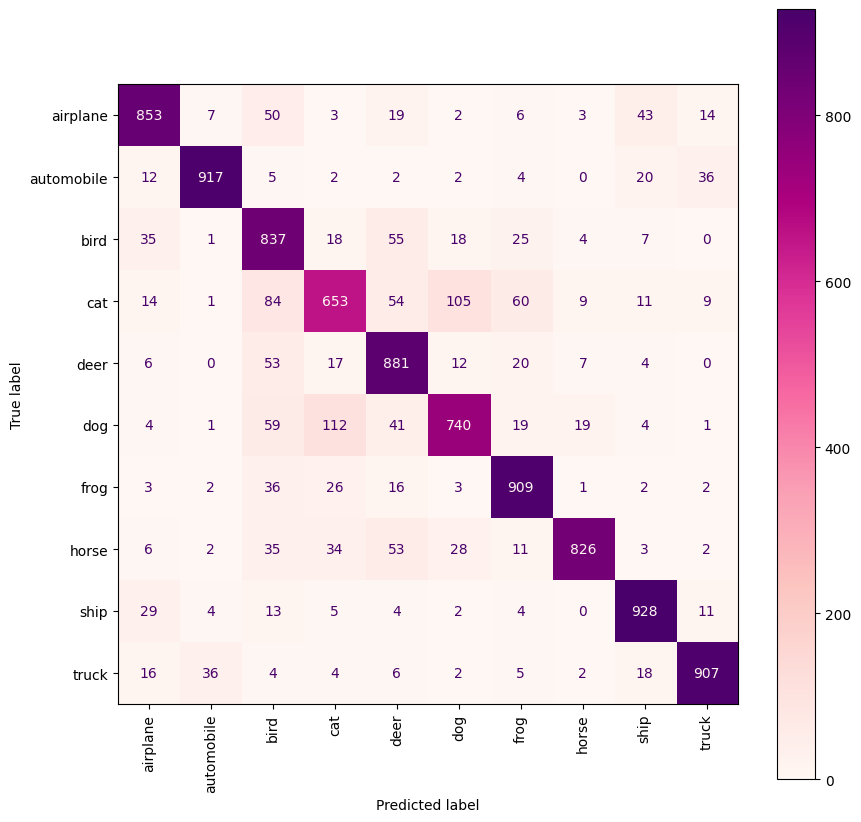

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))

disp.plot(cmap=plt.cm.RdPu, ax=ax, xticks_rotation='vertical')
plt.show()